In [29]:
!pip install --upgrade pip
!pip install --upgrade scipy

In [86]:
import matplotlib.pyplot as plt
import pathlib
import sys
import pandas as pd

In [31]:
from src.mixture_fit import fits, sum_exp
from src.data_loading import load_data
from src.optimal_number import AIC_analysis, BIC_analysis

In [32]:
home = pathlib.Path.home().joinpath("PycharmProjects", "DOSY")
sys.path.insert(1, home)

fontsize=15
color="blue"
figsize=(10,6)

In [33]:
def plot(x, y, title=None):
    plt.scatter(x, y, color="red", s=10, label="data")
    plt.ylabel('$I/I_0$', fontsize=fontsize)
    plt.xlabel('Z * 1e-6', fontsize=fontsize)
    plt.title(title, fontsize=fontsize)
    plt.legend(fontsize=fontsize)


def param_print(array):
    print("(w, D)")
    print("-----------------")
    for a in array:
        for i in range(0, len(a), 2):
            print((a[i], a[i+1]))
        print()

#### R1

In [47]:
path = home.joinpath("data", "R1 128DOSY.txt")
scale = 1e6
x, y = load_data(path, scale=scale)

In [48]:
print("Curve_fit")

params_cf, s_cf = fits(x, y, n_max=4, method="curve_fit")
print(s_cf)
print()
param_print(params_cf)

print()
print("Dual annealing")
params_da, s_da = fits(x, y, n_max=4, method="dual_annealing")
print(s_da)
print()
param_print(params_da)

Curve_fit
0.022193199365312166

(w, D)
-----------------
(0.9991165062597174, 0.2190670265827069)

(0.9885306499481403, 0.21714525136225907)
(0.019367376889639392, 1.1925313260157917)

(0.9858597527849976, 0.2168594116312792)
(0.01740122859804492, 0.796933483444838)
(0.010000000000000002, 9.999999999999998)

(0.9832194482409474, 0.2165699795700553)
(0.010000000000000002, 0.6025242250801329)
(0.010000000000000002, 0.8317359532096318)
(0.010000000000000002, 9.999999999999998)


Dual annealing
0.022193199365312166

(w, D)
-----------------
(0.9990902868239601, 0.21906096887404758)

(0.5462466123960794, 0.19894226393445327)
(0.45585011326247266, 0.24922569916346365)

(0.48823221144363854, 0.21582797590905806)
(0.4882480982336095, 0.21582833646122218)
(0.028742933081181622, 0.6089873304064419)

(0.3252176060798488, 0.21575651366304488)
(0.32521630040418786, 0.2157565358705104)
(0.32521693088654313, 0.21575664052155583)
(0.029468214699908134, 0.5936819652050844)



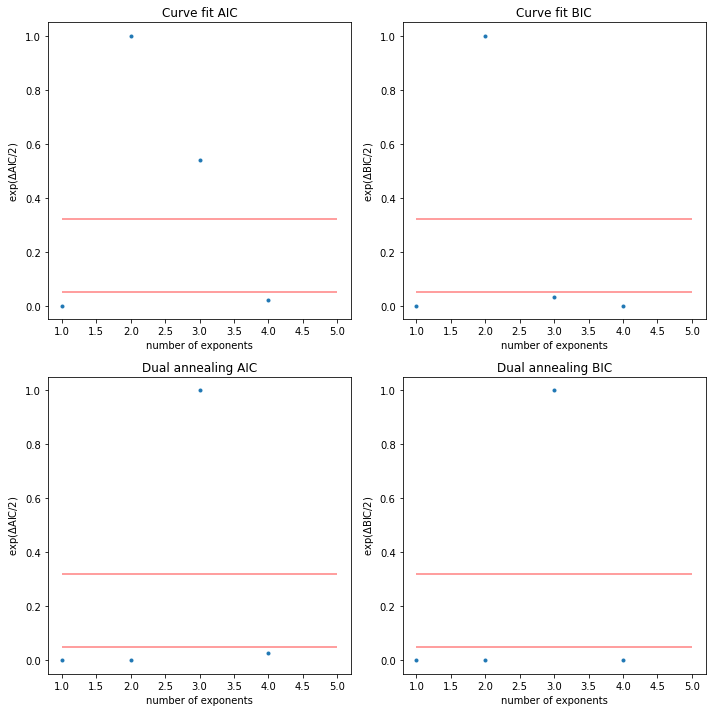

In [36]:
plt.figure(figsize=(10,10))

aics, aic_probs = AIC_analysis(x, y, params_cf, s_cf)[1:]

plt.subplot(221)
plt.plot(range(1, len(aics)+1), aic_probs, '.')
plt.hlines(0.32, 1, len(aics) + 1, 'r', alpha=0.5)
plt.hlines(0.05, 1, len(aics) + 1, 'r', alpha=0.5)
plt.ylabel('exp($\Delta$AIC/2)')
plt.xlabel('number of exponents')
plt.title("Curve fit AIC")

bics, bic_probs = BIC_analysis(x, y, params_cf, s_cf)[1:]

plt.subplot(222)
plt.plot(range(1, len(bics)+1), bic_probs, '.')
plt.hlines(0.32, 1, len(bics) + 1, 'r', alpha=0.5)
plt.hlines(0.05, 1, len(bics) + 1, 'r', alpha=0.5)
plt.ylabel('exp($\Delta$BIC/2)')
plt.xlabel('number of exponents')
plt.title("Curve fit BIC")


aics, aic_probs = AIC_analysis(x, y, params_da, s_da)[1:]

plt.subplot(223)
plt.plot(range(1, len(aics)+1), aic_probs, '.')
plt.hlines(0.32, 1, len(aics) + 1, 'r', alpha=0.5)
plt.hlines(0.05, 1, len(aics) + 1, 'r', alpha=0.5)
plt.ylabel('exp($\Delta$AIC/2)')
plt.xlabel('number of exponents')
plt.title("Dual annealing AIC")


bics, bic_probs = BIC_analysis(x, y, params_da, s_da)[1:]

plt.subplot(224)
plt.plot(range(1, len(bics)+1), bic_probs, '.')
plt.hlines(0.32, 1, len(bics) + 1, 'r', alpha=0.5)
plt.hlines(0.05, 1, len(bics) + 1, 'r', alpha=0.5)
plt.ylabel('exp($\Delta$BIC/2)')
plt.xlabel('number of exponents')
plt.title("Dual annealing BIC")

plt.tight_layout()
plt.show()

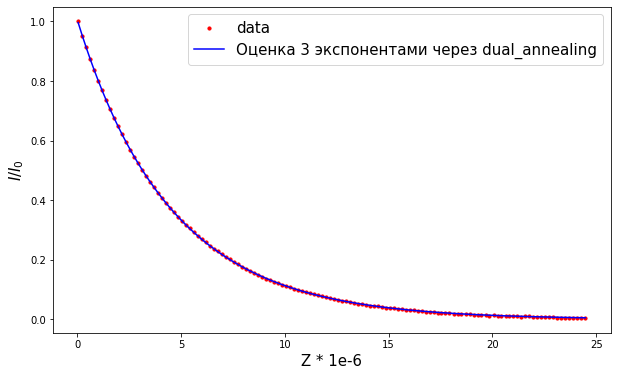

In [37]:
plt.figure(figsize=figsize)

y_est_da3 = sum_exp(params_da[2], x)

plot(x, y)
plt.plot(x, y_est_da3, color="blue", label="Оценка 3 экспонентами через dual_annealing")
plt.legend(fontsize=fontsize)
plt.show()

<Figure size 720x432 with 0 Axes>

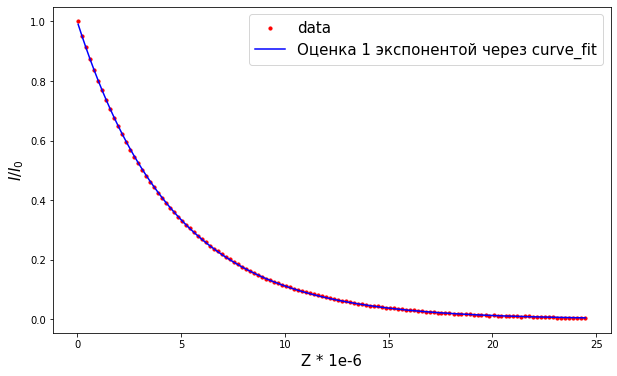

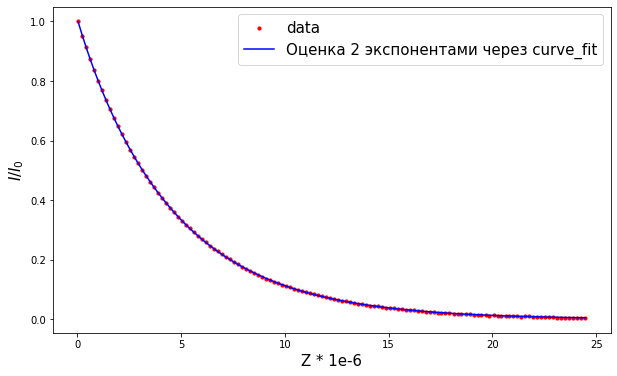

In [52]:
plt.figure(figsize=figsize)

y_est_cf1 = sum_exp(params_cf[0], x)
y_est_cf2 = sum_exp(params_cf[1], x)

plt.figure(figsize=figsize)
plot(x, y)
plt.plot(x, y_est_cf1, color="blue", label="Оценка 1 экспонентой через curve_fit")
plt.legend(fontsize=fontsize)
plt.show()


plt.figure(figsize=figsize)
plot(x, y)
plt.plot(x, y_est_cf2, color="blue", label="Оценка 2 экспонентами через curve_fit")
plt.legend(fontsize=fontsize)
plt.show()

- Экспоненты 2 и 3 для dual_annealing совпадают, т.е. на самом деле экспонент 2, выбираем более консервативную оценку
- Критерии AIC, BIC для curve_fit говорят, что экспоненты 2. Видим, что данные хорошо ложатся даже на 1 экспоненту -> экспонента с маленькой примесью

__Вывод:__

- В R1 128DOSY.txt две компоненты с параметрами (0.988, 0.21714), (0.019, 1.19253)

- Так как при аппроксимации 1 экспонентой коэффициент самодиффузии равен 0.21907, считаем, что главная компонента имеет коэффициент самодиффузии 0.218

- Изначально предполагалось, что экспонента одна. Это хорошо согласуется с результатами, так как массовая доля примеси всего 2%

In [61]:
def metrics_plot(x, y, params_cf, s_cf, params_da, s_da):
    plt.figure(figsize=(10,10))

    m_cf_aic, aics, aic_probs = AIC_analysis(x, y, params_cf, s_cf)

    plt.subplot(221)
    plt.plot(range(1, len(aics)+1), aic_probs, '.')
    plt.hlines(0.32, 1, len(aics) + 1, 'r', alpha=0.5)
    plt.hlines(0.05, 1, len(aics) + 1, 'r', alpha=0.5)
    plt.ylabel('exp($\Delta$AIC/2)')
    plt.xlabel('number of exponents')
    plt.title("Curve fit AIC")

    m_cf_bic, bics, bic_probs = BIC_analysis(x, y, params_cf, s_cf)

    plt.subplot(222)
    plt.plot(range(1, len(bics)+1), bic_probs, '.')
    plt.hlines(0.32, 1, len(bics) + 1, 'r', alpha=0.5)
    plt.hlines(0.05, 1, len(bics) + 1, 'r', alpha=0.5)
    plt.ylabel('exp($\Delta$BIC/2)')
    plt.xlabel('number of exponents')
    plt.title("Curve fit BIC")


    m_da_aic, aics, aic_probs = AIC_analysis(x, y, params_da, s_da)

    plt.subplot(223)
    plt.plot(range(1, len(aics)+1), aic_probs, '.')
    plt.hlines(0.32, 1, len(aics) + 1, 'r', alpha=0.5)
    plt.hlines(0.05, 1, len(aics) + 1, 'r', alpha=0.5)
    plt.ylabel('exp($\Delta$AIC/2)')
    plt.xlabel('number of exponents')
    plt.title("Dual annealing AIC")


    m_da_bic, bics, bic_probs = BIC_analysis(x, y, params_da, s_da)

    plt.subplot(224)
    plt.plot(range(1, len(bics)+1), bic_probs, '.')
    plt.hlines(0.32, 1, len(bics) + 1, 'r', alpha=0.5)
    plt.hlines(0.05, 1, len(bics) + 1, 'r', alpha=0.5)
    plt.ylabel('exp($\Delta$BIC/2)')
    plt.xlabel('number of exponents')
    plt.title("Dual annealing BIC")

    plt.tight_layout()
    plt.show()

    return m_cf_aic, m_cf_bic, m_da_aic, m_da_bic



def graphics_plot(x, y, params_cf, params_da, m_cf_aic, m_cf_bic, m_da_aic, m_da_bic):
    plt.figure(figsize=(12, 12))

    plt.subplot(221)
    plt.plot(x, sum_exp(params_cf[m_cf_aic], x))
    plot(x, y, "{} exponents, curve fit, AIC".format(m_cf_aic+1))

    plt.subplot(222)
    plt.plot(x, sum_exp(params_cf[m_cf_bic], x))
    plot(x, y, "{} exponents, curve fit, BIC".format(m_cf_bic+1))

    plt.subplot(223)
    plt.plot(x, sum_exp(params_da[m_da_aic], x))
    plot(x, y, "{} exponents, dual annealing, AIC".format(m_da_aic+1))


    plt.subplot(224)
    plt.plot(x, sum_exp(params_da[m_da_bic], x))
    plot(x, y, "{} exponents, curve fit, AIC".format(m_da_bic+1))

    plt.tight_layout()
    plt.show()



def dosy_analysis(path, n_min=1, n_max=3):
    x, y = load_data(path, scale=1e6)

    params_cf, s_cf = fits(x, y, n_min=n_min, n_max=n_max, method="curve_fit")
    params_da, s_da = fits(x, y, n_min=n_min ,n_max=n_max, method="dual_annealing")

    m_cf_aic, m_cf_bic, m_da_aic, m_da_bic = metrics_plot(x, y, params_cf, s_cf, params_da, s_da)

    graphics_plot(x, y, params_cf, params_da, m_cf_aic, m_cf_bic, m_da_aic, m_da_bic)

    print("Curve fit")
    print("---------------------------")
    param_print(params_cf)

    print()

    print("Dual annealing")
    print("---------------------------")
    param_print(params_da)

    return x, y, params_cf, params_da

#### R2

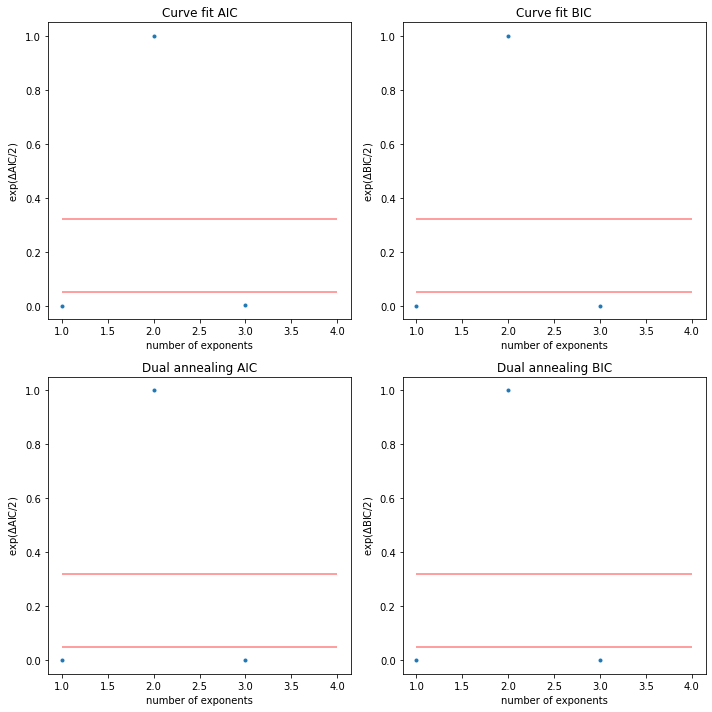

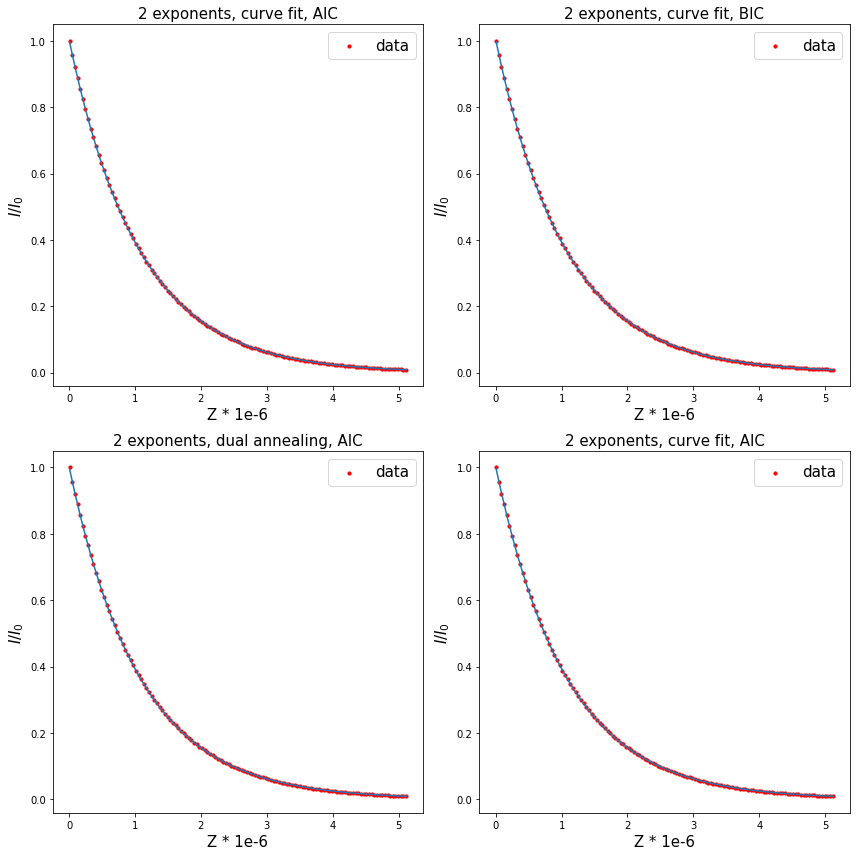

Curve fit
---------------------------
(w, D)
-----------------
(0.9999999999973622, 0.931028689121307)

(0.9917924522568302, 0.9260075078570514)
(0.012293405925802421, 2.9343948398743023)

(0.010000000000000002, 0.5972751252977575)
(0.9879562231693476, 0.9339197071438302)
(0.010000000000000002, 9.999999999999998)


Dual annealing
---------------------------
(w, D)
-----------------
(0.9999978572528896, 0.9310305931198968)

(0.366833571541473, 0.8361804427999501)
(0.6357743586115753, 0.9973512856313027)

(0.012054329703025881, 0.483355645928939)
(0.9739632763953459, 0.939125394576865)
(0.0159121913652338, 1.075712409355689)



In [55]:
dosy_analysis(home.joinpath("data", "R2 128DOSY.txt"))

__Вывод:__

- В R2 128DOSY.txt критерии AIC, BIC дают 2 экспоненты для обоих методов, но так как массовая доля примеси всего 1%, можно считать, что образец чистый

- Хорошо сработал метод curve_fit. Dual_annealing даёт две экспоненты с одинаковыми коэффициентами самодиффузии -> можно быть уверенным, что экспонента одна

- Коэффициент самодиффузии равен 0.931

#### R3

/Users/goloshch/.conda/envs/DOSY/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


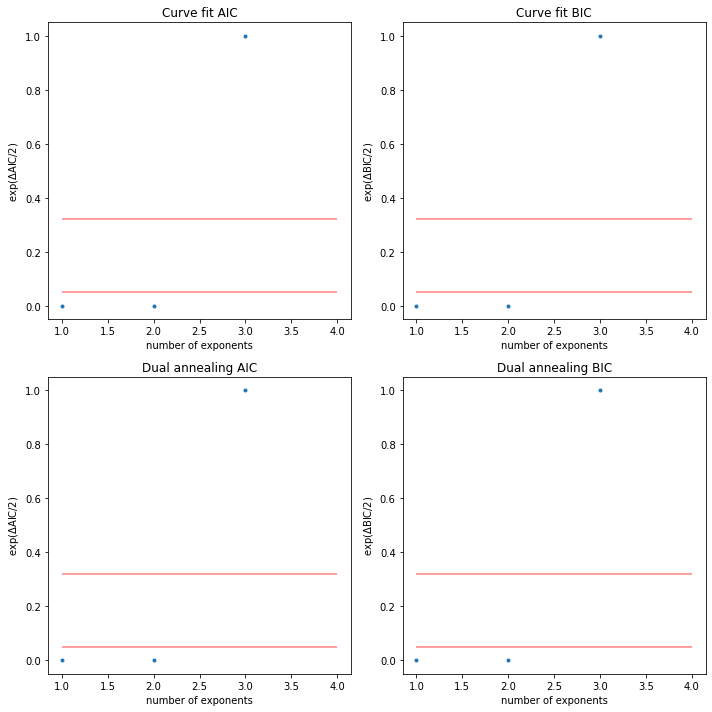

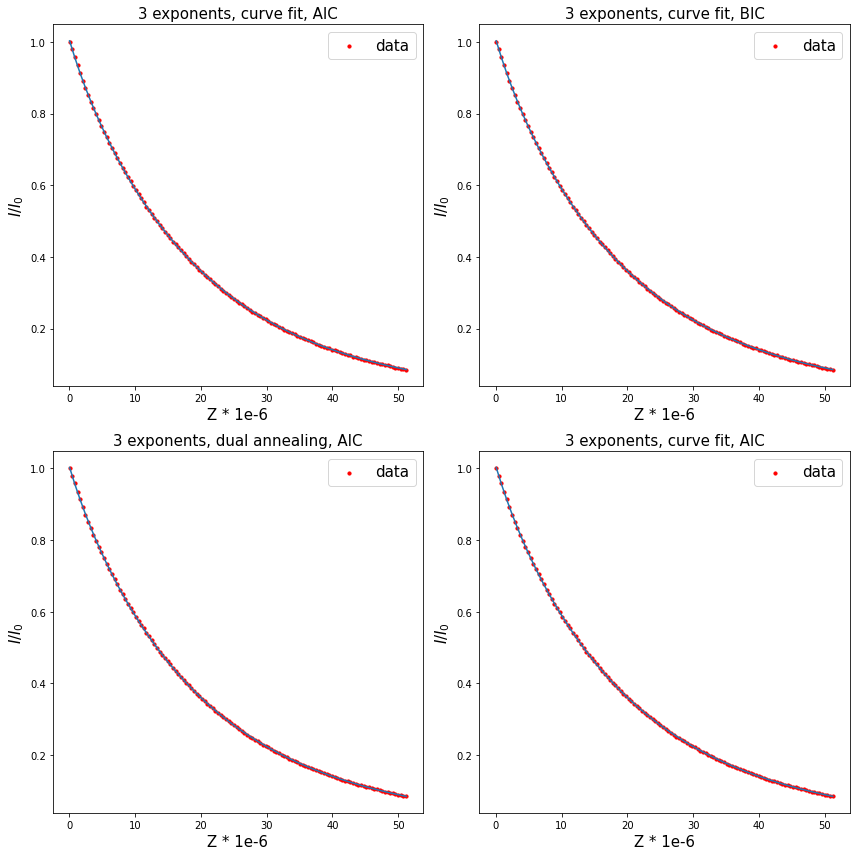

Curve fit
---------------------------
(w, D)
-----------------
(0.9805231069633603, 0.049485617875014654)

(0.8935029083200113, 0.04622433582543583)
(0.10989547471917022, 0.1413382939400691)

(0.11898897231043243, 0.02569656544226311)
(0.854340332210204, 0.05404600603279723)
(0.034604176342922406, 0.3748837847977265)


Dual annealing
---------------------------
(w, D)
-----------------
(0.9804636474609678, 0.04948229873553288)

(0.8884448588419854, 0.04608790746443941)
(0.11465855821101983, 0.1367448545624012)

(0.42111122901170794, 0.03768400912324764)
(0.5554837184925674, 0.061364132104813486)
(0.030917878032953847, 0.3789952607213877)



In [63]:
x, y, params_cf, params_da = dosy_analysis(home.joinpath("data", "R3 128DOSY.txt"))

Хотелось бы получить 1-2 экспоненты, а получается 3.

1. Видно, что одна экспонента не очень хорошо фитирует данные в начале и конце

2. Для 3 экспонент по методу curve_fit параметры 2 и 3 экспонент почти одинаковы -> считаем, что их две

3. По доверительной области видно, что две экспоненты плохо различаются для параметров, полученных через curve_fit -> это нормально, что получается 3 штуки

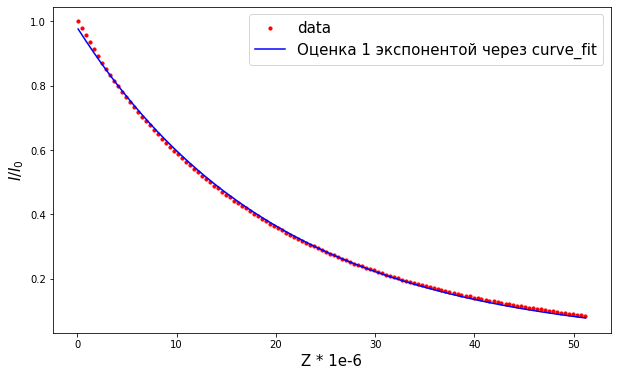

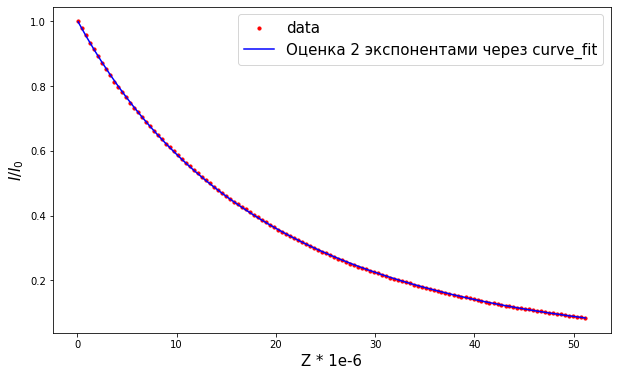

In [64]:
y_est_cf1 = sum_exp(params_cf[0], x)
y_est_cf2 = sum_exp(params_cf[1], x)

plt.figure(figsize=figsize)
plot(x, y)
plt.plot(x, y_est_cf1, color="blue", label="Оценка 1 экспонентой через curve_fit")
plt.legend(fontsize=fontsize)
plt.show()

plt.figure(figsize=figsize)
plot(x, y)
plt.plot(x, y_est_cf2, color="blue", label="Оценка 2 экспонентами через curve_fit")
plt.legend(fontsize=fontsize)
plt.show()



<div>
<img src="/Users/goloshch/PycharmProjects/DOSY/Презентация/Множество.png" width="500"/>
</div>

__Вывод__

- Для R3 получается две экспоненты c параметрами (0.89, 0.046), (0.11, 0.139)

#### R4

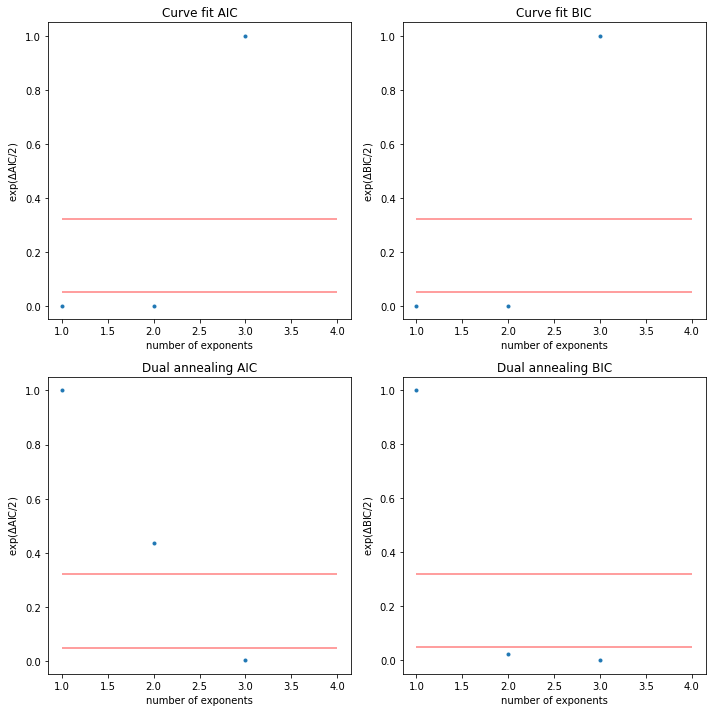

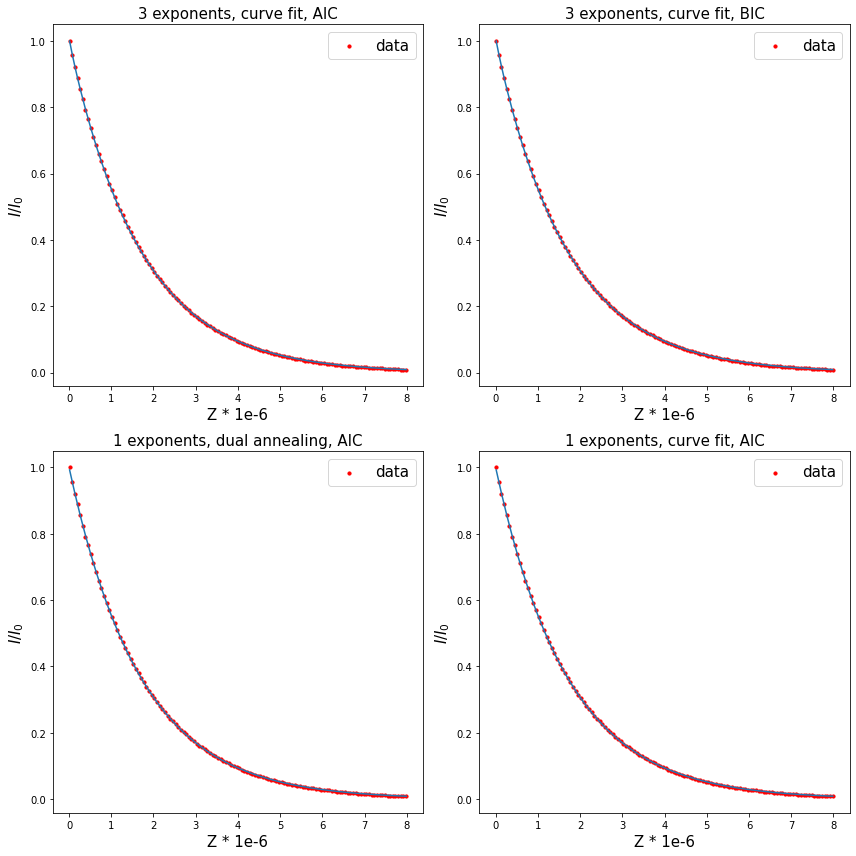

Curve fit
---------------------------
(w, D)
-----------------
(0.9999999996991752, 0.5901490611488401)

(0.010006167189513157, 0.590424655593931)
(0.9904887860765755, 0.5904422658529628)

(0.9865750163106091, 0.5890714755528301)
(0.011481540896748011, 0.5891886691217356)
(0.010000000000000002, 9.994162910419027)


Dual annealing
---------------------------
(w, D)
-----------------
(0.9999986274911663, 0.5901416800822286)

(0.5002267226772523, 0.5904265385655587)
(0.5002531039926018, 0.5904288806873124)

(0.9018241147459432, 0.5843553145693388)
(0.08937045179804469, 0.6280221303804427)
(0.010043490140625102, 1.0142218397380354)



In [65]:
x, y, params_cf, params_da = dosy_analysis(home.joinpath("data", "R4 128DOSY.txt"))

__Вывод__

- По коэффициентам видно, что экспонента одна
- Коэффициент самодиффузии равен 0.590


#### R5

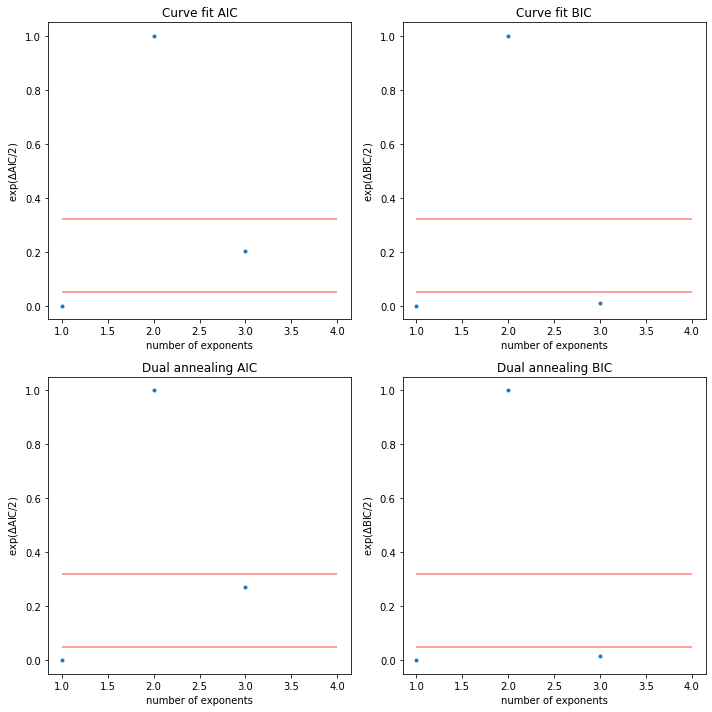

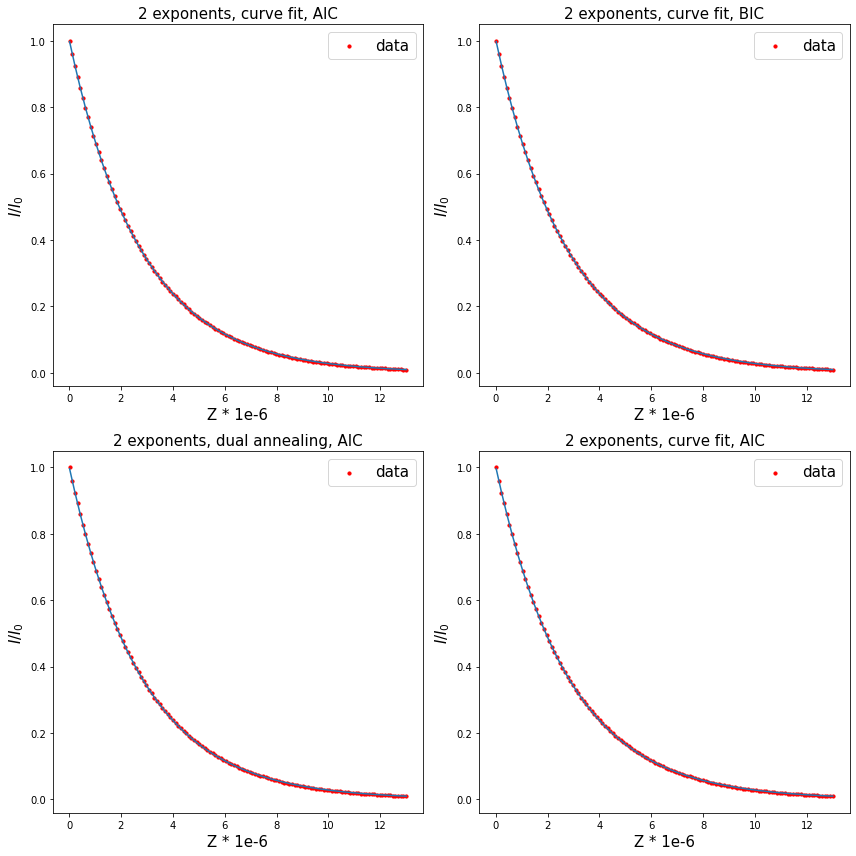

Curve fit
---------------------------
(w, D)
-----------------
(0.9999995449704322, 0.35816751114836215)

(0.995235070826405, 0.357165349440136)
(0.010000000000001336, 1.2509314465490018)

(0.9910367492308074, 0.3571840679214819)
(0.010000000000645291, 0.5521188451145607)
(0.010000000000000002, 9.999999999999998)


Dual annealing
---------------------------
(w, D)
-----------------
(0.999997893850125, 0.35816909792982277)

(0.4940581460606539, 0.33572677787149807)
(0.5093241751934402, 0.3847737333404452)

(0.3231327683177979, 0.34169487631444884)
(0.32312695867940644, 0.3416964505253809)
(0.3571687895510768, 0.3951146986206942)



In [67]:
x, y, params_cf, params_da = dosy_analysis(home.joinpath("data", "R5 128DOSY.txt"))

__Вывод__

- dual_annealing даёт 2 экспоненты с одинаковыми параметрами, curve_fit даёт 1% примеси -> чистый образец
- Параметр равен 0.358

### Итог по данным R1-R5

1. Если не принимать во внимание примеси(вклад порядка 1%), можно считать, что R1-R5 содержат одну компоненту с коэффициентами самодиффузии

- __R1__:   $0.218 \cdot 10^6$

- __R2__:   $0.931 \cdot 10^6$

- __R3__:   $0.046 \cdot 10^6$

- __R4__:   $0.590 \cdot 10^6$

- __R5__:   $0.358 \cdot 10^6$

2. Метод curve_fit работает стабильнее, по dual_annealing удобно сравнивать соседнее количество экспонент


3. В спорных ситуациях есть смысл посмотреть на доверительную область/ график для n±1 экспоненты/ графики AIC и BIC


4. Лучше отдавать предпочтение оценке с меньшим количеством экспонент

### Смеси


- Знаем коэффициенты самодиффузии для компонент R1-R5, две экспоненты получилось только для R3
- Проверим смеси R1-R2, R2-R4, R2-R5 для разных массовых долей компонент. Хотим получить совпадение коэффициентов самодиффузии и массовых долей

#### R1-R2

/Users/goloshch/.conda/envs/DOSY/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


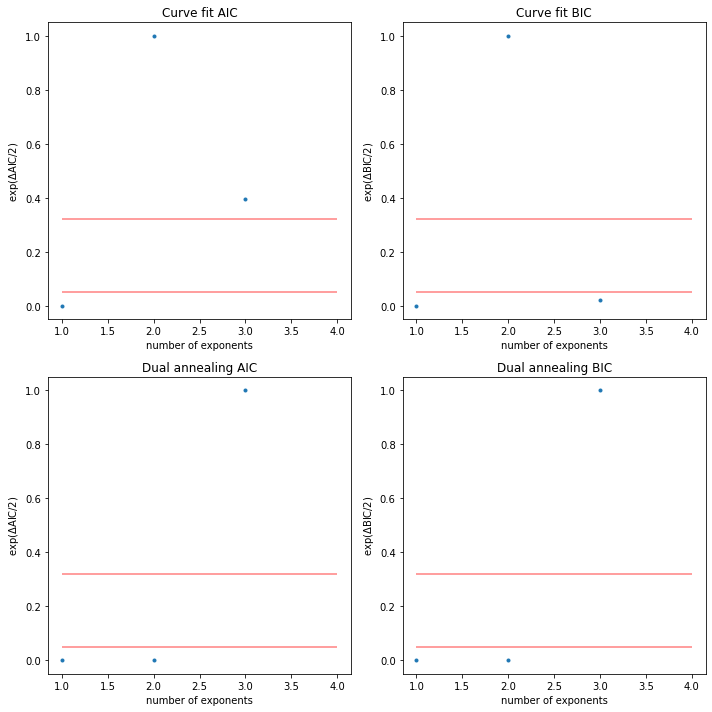

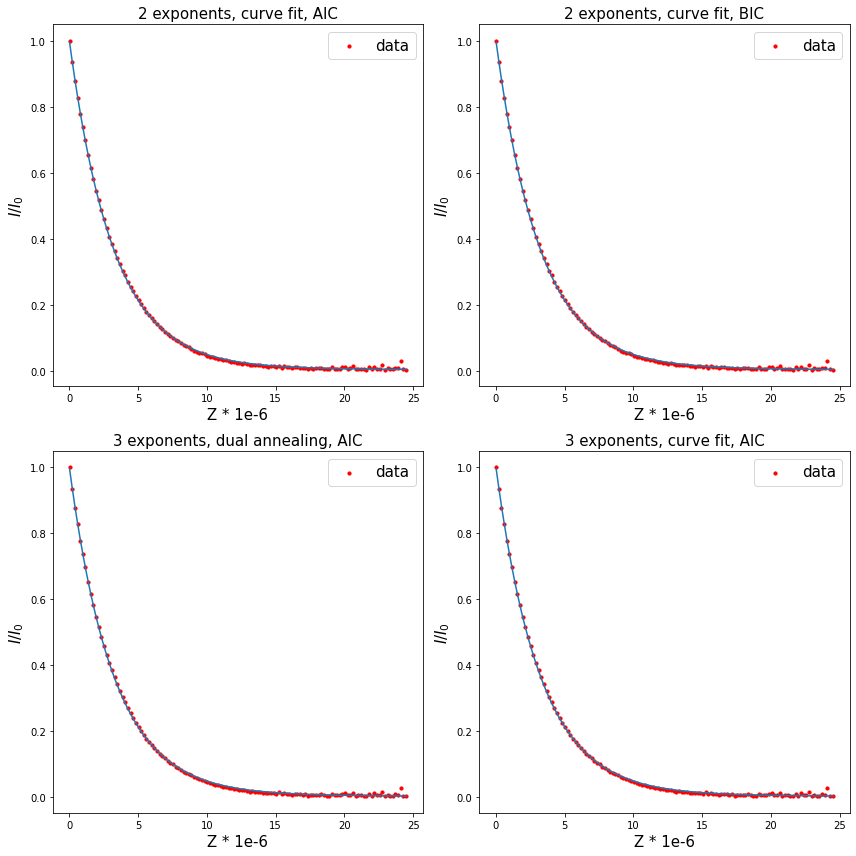

Curve fit
---------------------------
(w, D)
-----------------
(0.9999999999999999, 0.30565614425741494)

(0.010000000000003263, 0.039439224975828455)
(0.997388372299362, 0.3146077443136734)

(0.010000000000000002, 0.040641265813107376)
(0.9956031299268007, 0.3139936797048212)
(0.010000000000000002, 9.999999999999998)


Dual annealing
---------------------------
(w, D)
-----------------
(0.9999939816517629, 0.305659973371592)

(0.3643475404867694, 0.2517118588704907)
(0.6429833414190718, 0.3482961194615752)

(0.010012636980345815, 0.039553386595283874)
(0.3884809295745637, 0.31094859059477675)
(0.6088564566874246, 0.31697410845371043)



In [69]:
x, y, params_cf, params_da = dosy_analysis(home.joinpath("data/R1-R2", "R1-5-0.txt"))

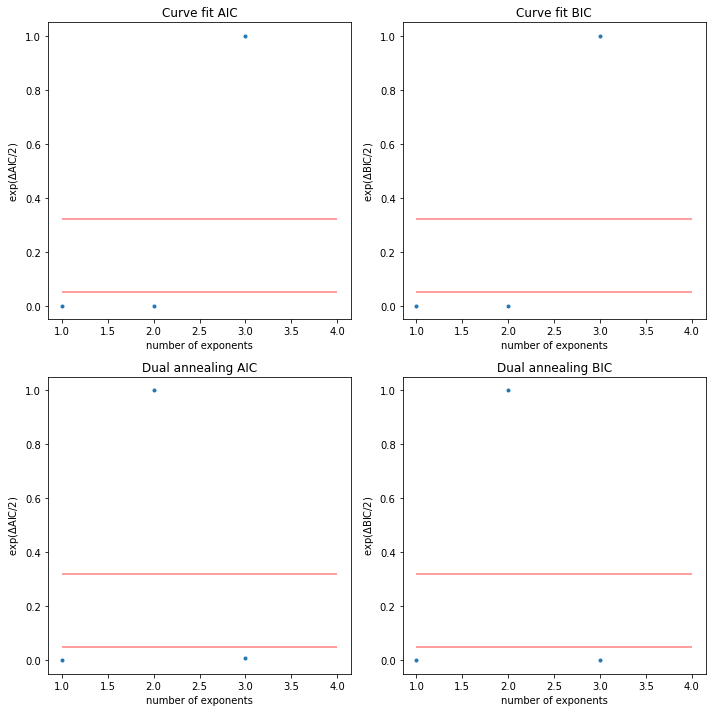

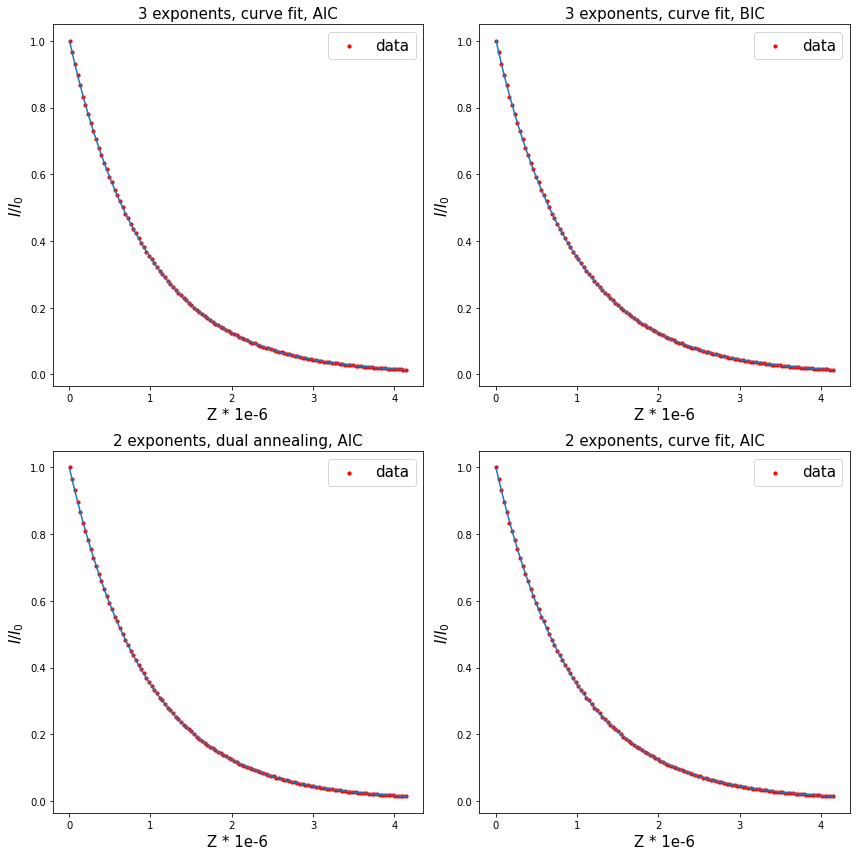

Curve fit
---------------------------
(w, D)
-----------------
(0.9997679982224779, 1.046248768864249)

(0.9875695239490884, 1.0364412478918548)
(0.018764655676287642, 4.245553208996911)

(0.013039877034470205, 0.5022550040312189)
(0.9841491845518087, 1.0552246443705027)
(0.01083724475371275, 9.999999999999998)


Dual annealing
---------------------------
(w, D)
-----------------
(0.9997353365159406, 1.0461957012846943)

(0.27359529677866146, 0.8699333390189137)
(0.7292903765263636, 1.1308486562130136)

(0.919104400964903, 1.0206291150472888)
(0.04141833740220079, 1.285255437355236)
(0.041774049886586166, 1.6820584664766065)



In [70]:
x, y, params_cf, params_da = dosy_analysis(home.joinpath("data/R1-R2", "R2-5-0.txt"))

**Чистые данные - коэффициенты самодиффузии**

- R1: 0.305
- R2: 1.046

---------------------------------
R1-R2-1-5



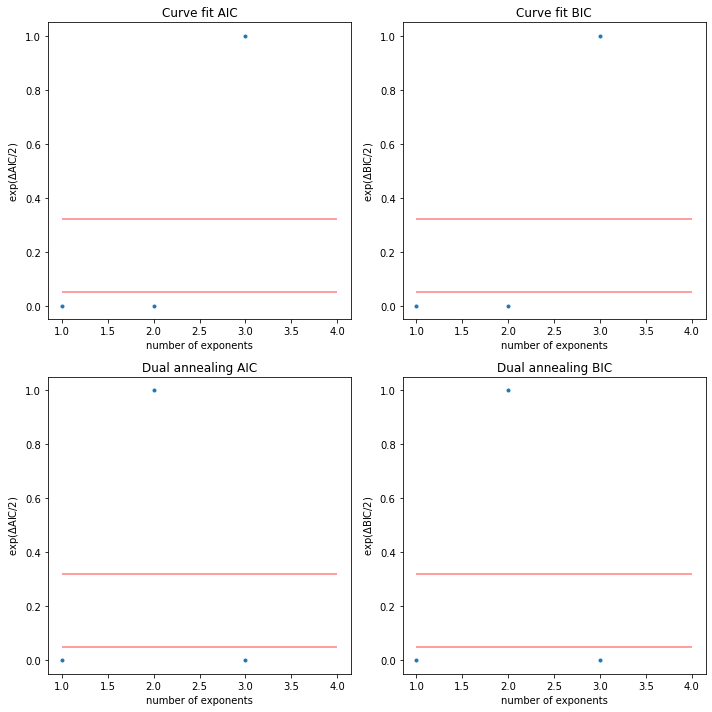

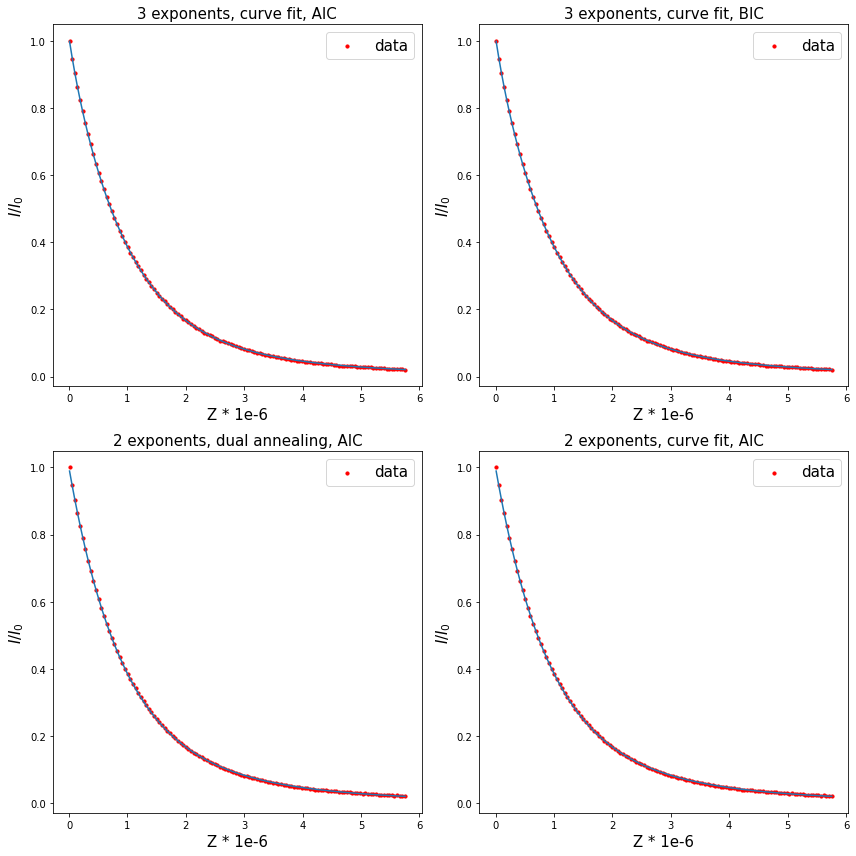

Curve fit
---------------------------
(w, D)
-----------------
(0.9622365562594292, 0.872899388325021)

(0.1757493210084424, 0.38785861421918344)
(0.8228507243664431, 1.1274369528659285)

(0.11705712090736606, 0.31479363759451756)
(0.8660348311801792, 1.055068296304203)
(0.02595416215738422, 8.158563274603464)


Dual annealing
---------------------------
(w, D)
-----------------
(0.9618926416516491, 0.8724279967068216)

(0.17220327043613276, 0.383834742071499)
(0.8261779444773701, 1.1239899757782987)

(0.4327130640348269, 0.5817436002740604)
(0.3064587319801144, 1.3810382292401606)
(0.2669987407081318, 1.401833347414038)

R1-R2-1-5-new



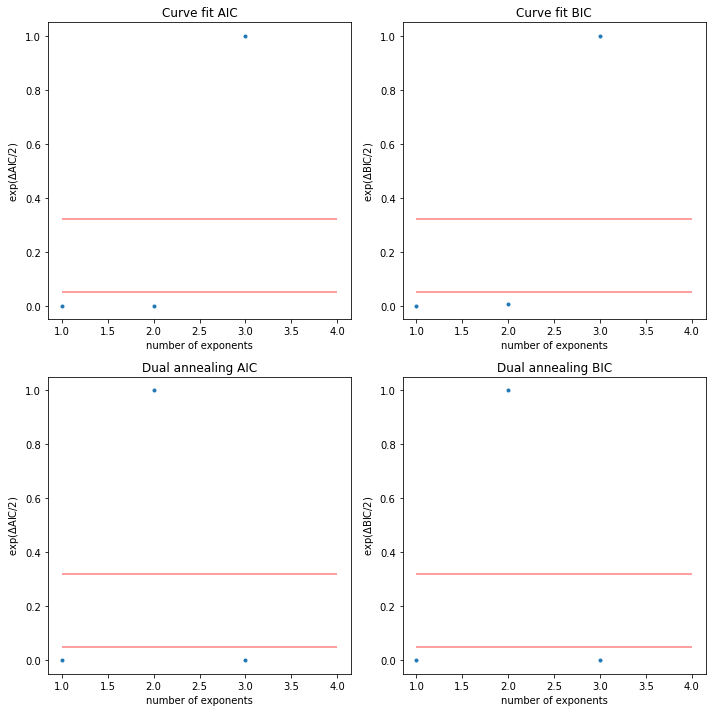

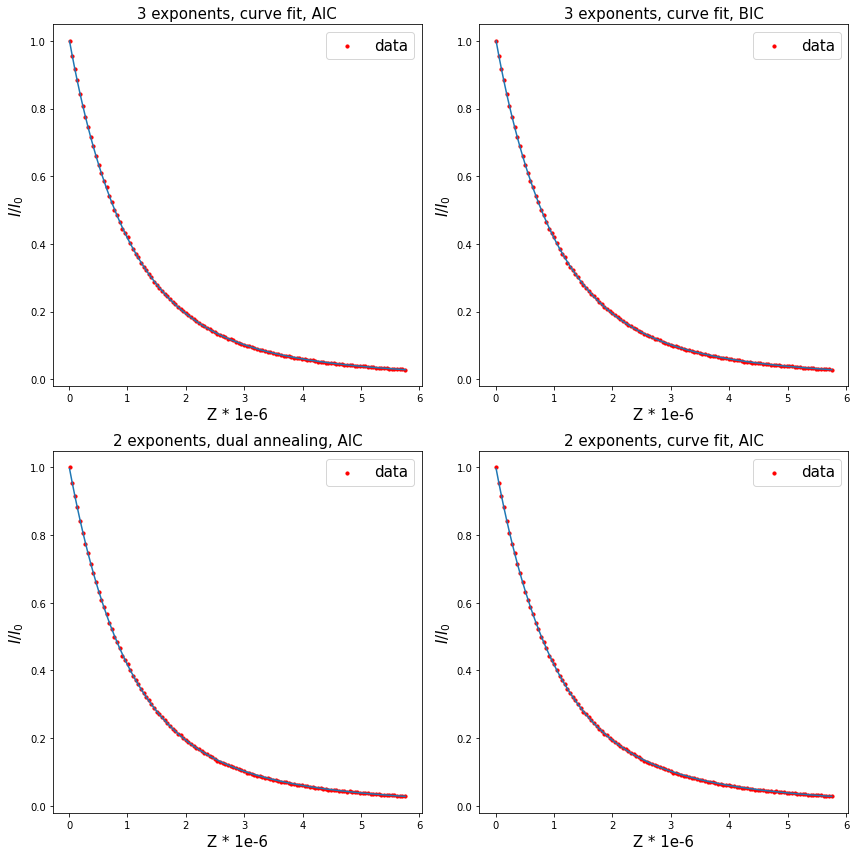

Curve fit
---------------------------
(w, D)
-----------------
(0.961389568949247, 0.7900942867870762)

(0.2068499263850365, 0.35876357689083616)
(0.7979876211473935, 1.0746075608248438)

(0.17924563436190952, 0.3337884604392097)
(0.8175054797288162, 1.0399556547689277)
(0.011409467777887948, 5.706289599191131)


Dual annealing
---------------------------
(w, D)
-----------------
(0.9610356187178688, 0.7896675300243831)

(0.20425858119725854, 0.35635838219558025)
(0.8004112275698919, 1.0720745487277195)

(0.44200244011681655, 0.5190619602347653)
(0.26829263593091657, 1.2960787006296748)
(0.30152851447683915, 1.3377001409474065)

---------------------------------
R1-R2-2-5



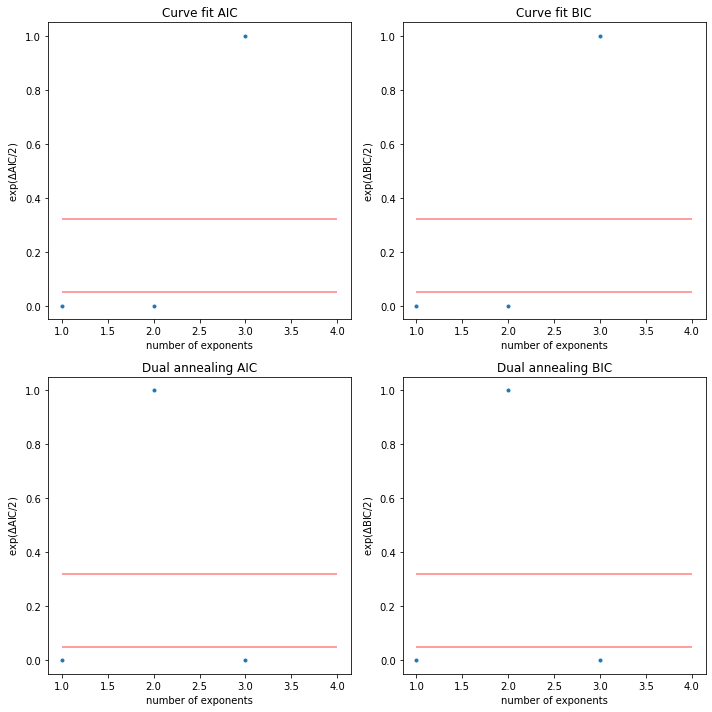

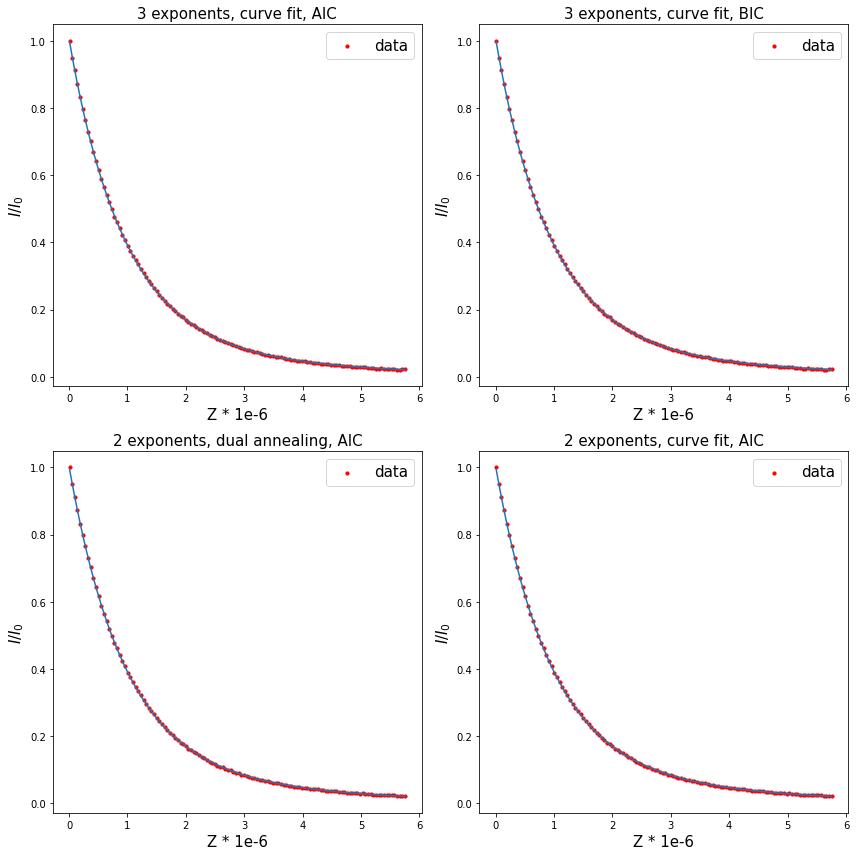

Curve fit
---------------------------
(w, D)
-----------------
(0.9701015161457399, 0.8680807856400271)

(0.14955440313563056, 0.3572879202994656)
(0.8545804872238765, 1.0904550028842208)

(0.12079968467288382, 0.31980000848420714)
(0.8726685509628099, 1.05337481904885)
(0.013691454347034091, 4.639470403249999)


Dual annealing
---------------------------
(w, D)
-----------------
(0.9697728371060839, 0.8676388940116266)

(0.1476826104529108, 0.3548453394356474)
(0.8563240229206133, 1.0886802764802623)

(0.4311539854060753, 0.5820192918266225)
(0.32447383153817744, 1.3516720400136146)
(0.25573793883721496, 1.3589489966586863)

R1-R2-2-5-new



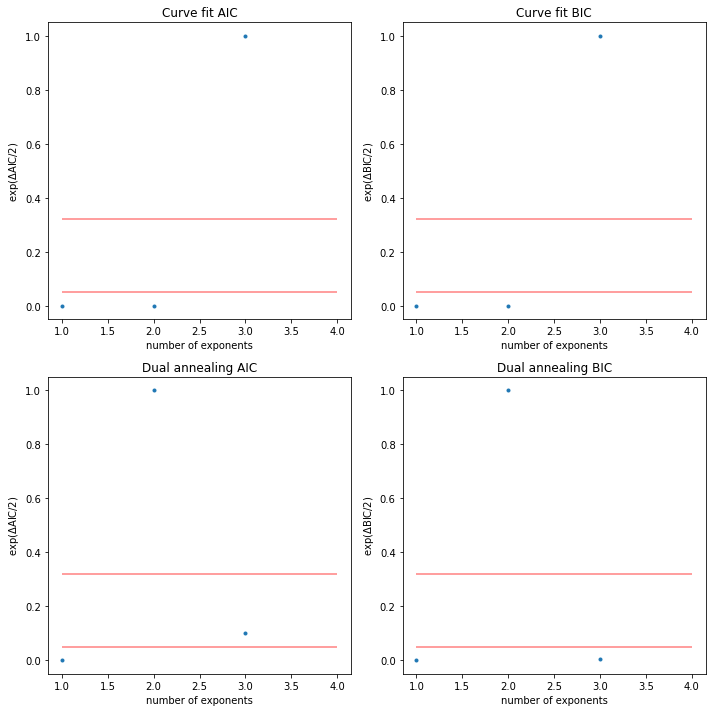

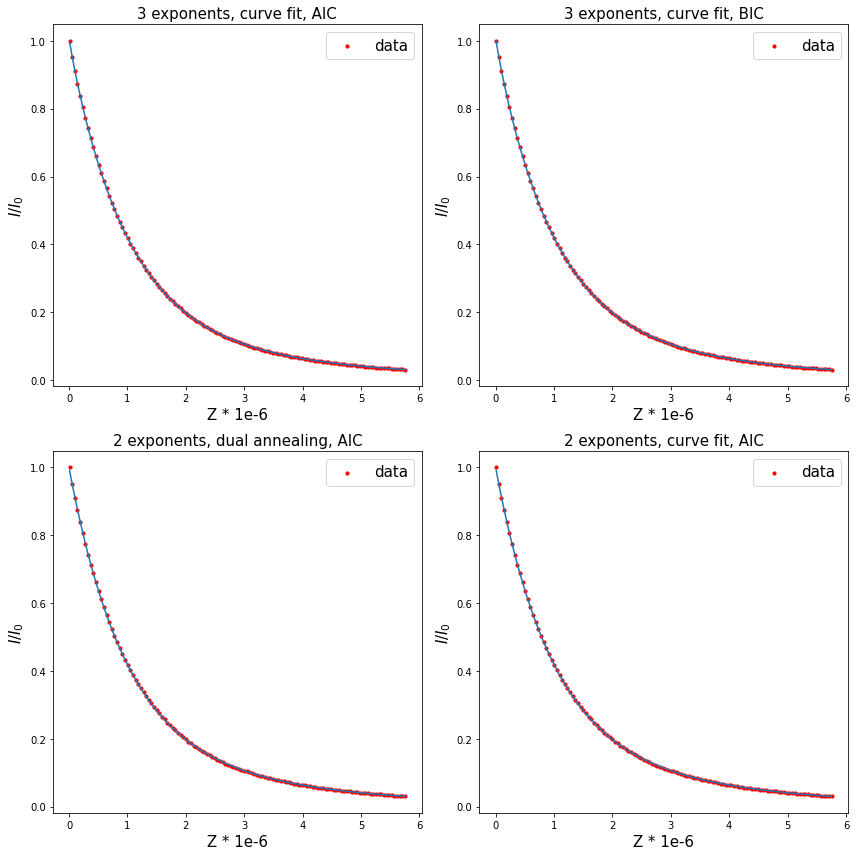

Curve fit
---------------------------
(w, D)
-----------------
(0.9534530971620389, 0.7736653756041303)

(0.21306161521509118, 0.34820672612065434)
(0.7870732595705463, 1.074516781482875)

(0.18206520096370246, 0.3204752042243643)
(0.8102875550816563, 1.0354258453390701)
(0.015054698593116504, 9.999999992606961)


Dual annealing
---------------------------
(w, D)
-----------------
(0.9530834961399832, 0.7732265250288147)

(0.2111478806078582, 0.3464798200501171)
(0.7888551361812566, 1.0725592159125803)

(0.20873396174826836, 0.34425769082023516)
(0.39551767070177984, 1.0701691573026948)
(0.3956229296221472, 1.0702033107312627)

---------------------------------
R1-R2-3-5



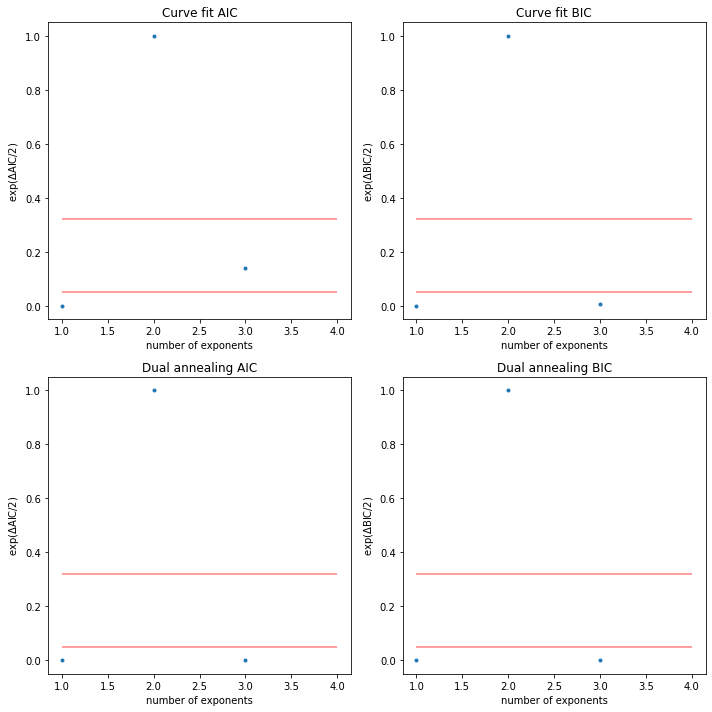

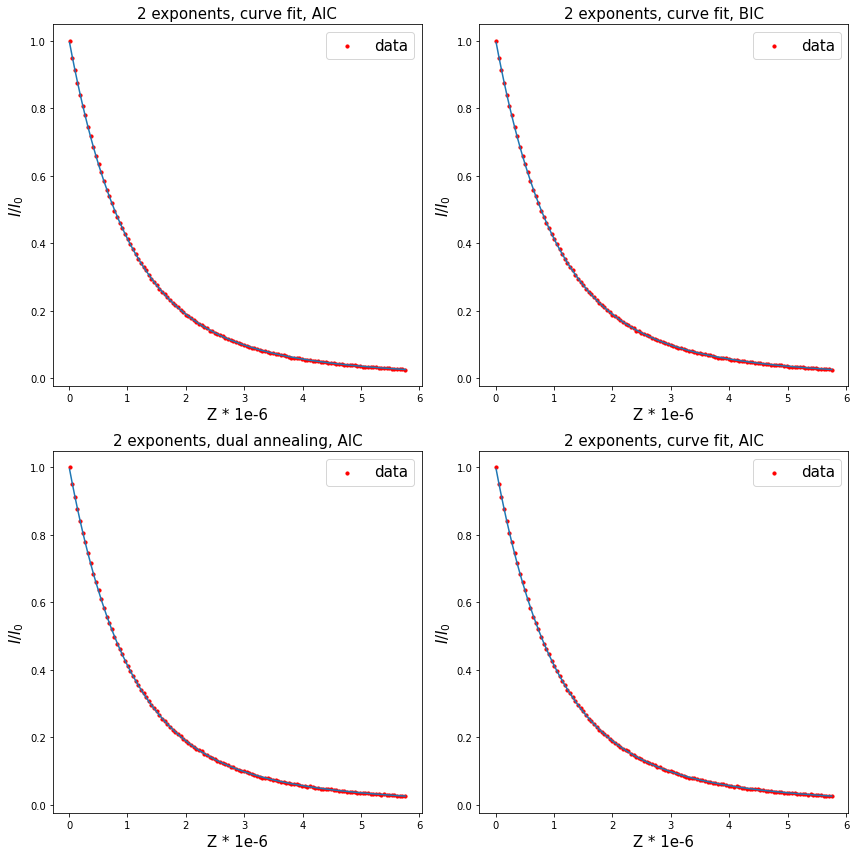

Curve fit
---------------------------
(w, D)
-----------------
(0.9637835413604184, 0.8040745819053399)

(0.19160625638999576, 0.3605758562576864)
(0.811932192125424, 1.0649859763463894)

(0.019003445385687826, 0.2222332375606002)
(0.18427541375967718, 0.3954553754069353)
(0.8003442395586662, 1.0712050202173151)


Dual annealing
---------------------------
(w, D)
-----------------
(0.9634489393647909, 0.8036641572728335)

(0.1890820944464626, 0.3580665258030675)
(0.8142973957904908, 1.0626214582755436)

(0.44166341091454786, 0.5340760397404627)
(0.33388103083576004, 1.3094703159209122)
(0.23488076699089921, 1.315248552483292)

R1-R2-3-5-new



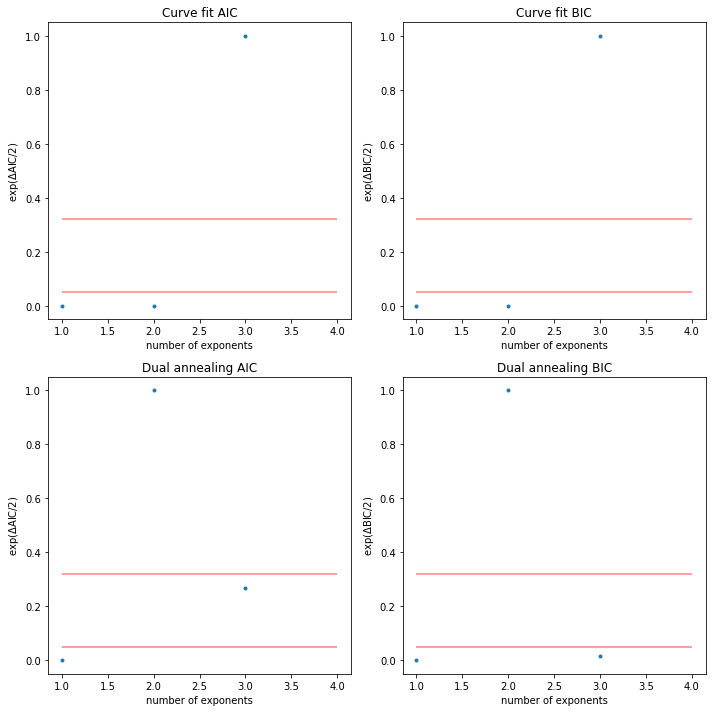

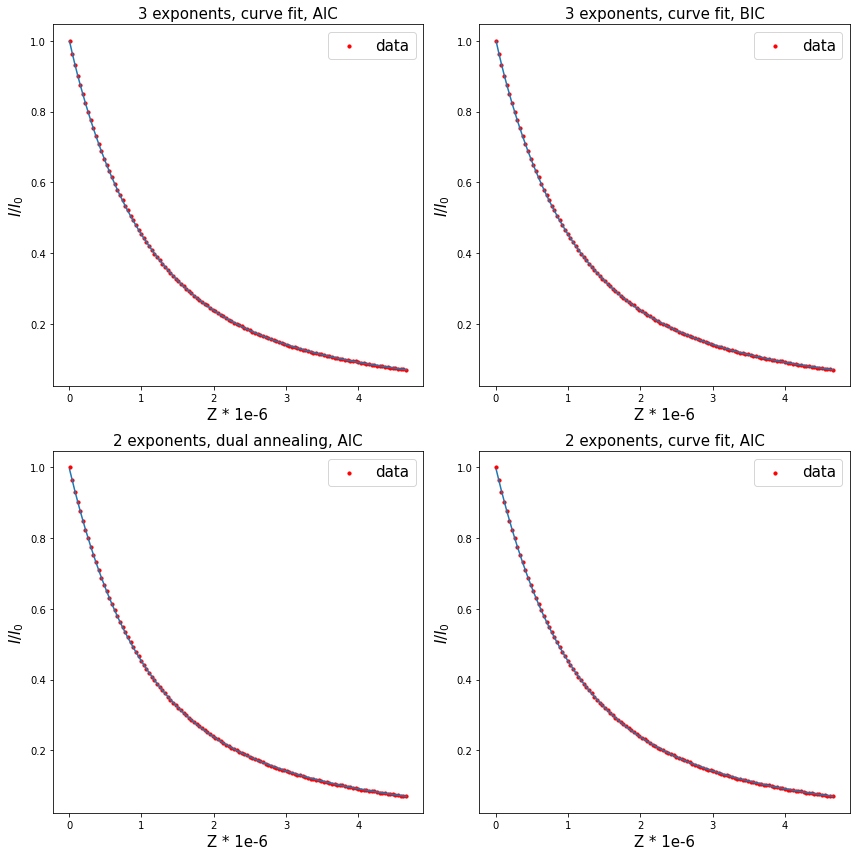

Curve fit
---------------------------
(w, D)
-----------------
(0.9370419737276886, 0.6697499453643472)

(0.3577306614965488, 0.3593354082900173)
(0.6430995172480966, 1.1531748625555243)

(0.3317791892942349, 0.3442294126154569)
(0.663550486297283, 1.1127330000561495)
(0.010000000000007461, 9.999983402801382)


Dual annealing
---------------------------
(w, D)
-----------------
(0.936717115649902, 0.6694170835850604)

(0.35421894785033, 0.35718962771104884)
(0.6464175452215998, 1.1486474087582497)

(0.09245013836766058, 0.28304425058022026)
(0.27395372639540294, 0.3995316703624265)
(0.6343014018952704, 1.1571789762358007)

---------------------------------
R1-R2-4-5



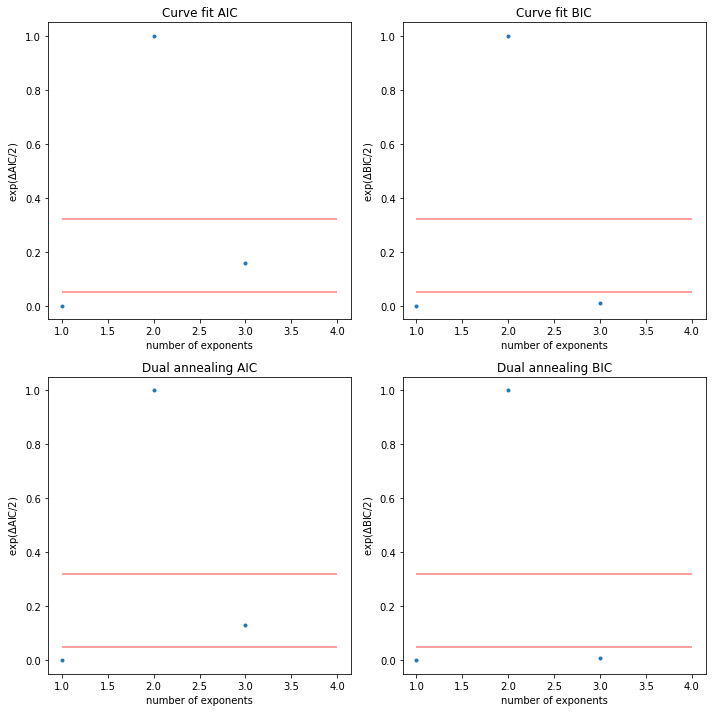

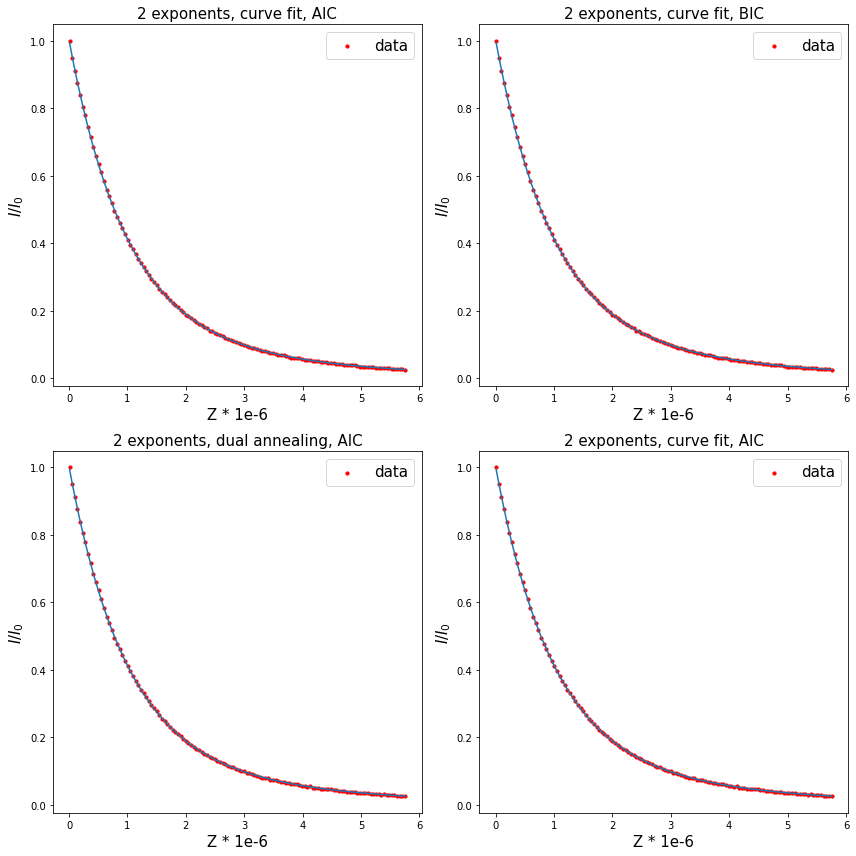

Curve fit
---------------------------
(w, D)
-----------------
(0.9630629602267446, 0.8038591754270115)

(0.19170974478690087, 0.3600664218946213)
(0.8112739342741653, 1.0657535142943004)

(0.14747895948029852, 0.328286790659998)
(0.11677169987486584, 0.6774152919670636)
(0.7389332215602957, 1.0930816551974156)


Dual annealing
---------------------------
(w, D)
-----------------
(0.9627269205790941, 0.8034465095444734)

(0.18917760449051893, 0.35754812230436345)
(0.8136459881366044, 1.0633724703718253)

(0.09223071777613225, 0.35428961447127477)
(0.09610414303829251, 0.35894880563077686)
(0.814457804802644, 1.06265429910537)

R1-R2-4-5-new



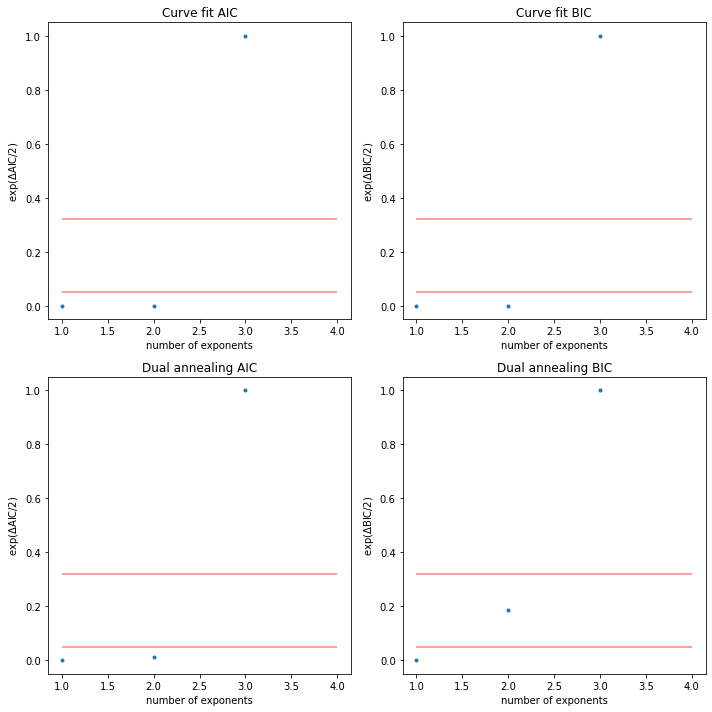

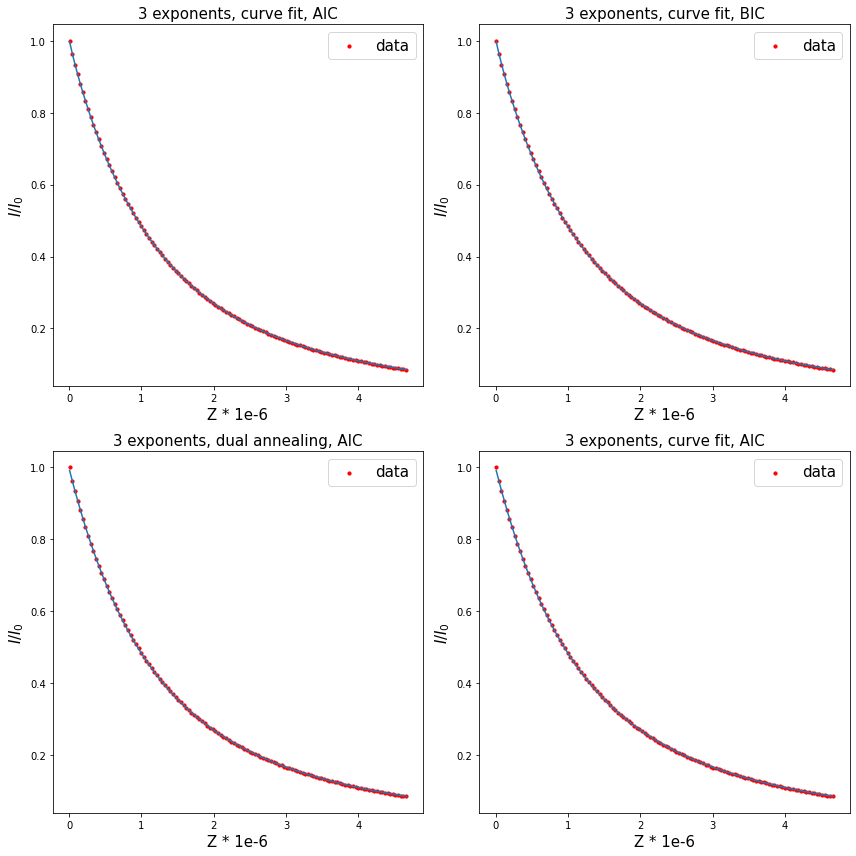

Curve fit
---------------------------
(w, D)
-----------------
(0.9317452373789589, 0.6026794339864257)

(0.434796004999438, 0.35789875416212924)
(0.5625892735038698, 1.1442839363899746)

(0.39249172101775015, 0.3376470451169067)
(0.5965948469072268, 1.0736455747034082)
(0.015155601169845066, 9.999999999989736)


Dual annealing
---------------------------
(w, D)
-----------------
(0.931459982743819, 0.6024192011391698)

(0.4300203958021081, 0.3555087076186679)
(0.567113698487223, 1.1373988011920835)

(0.07188032274357535, 0.19737992231727072)
(0.41419939823819285, 0.4352264045556791)
(0.5114314701400287, 1.1861008012868397)

---------------------------------
R1-R2-5-5



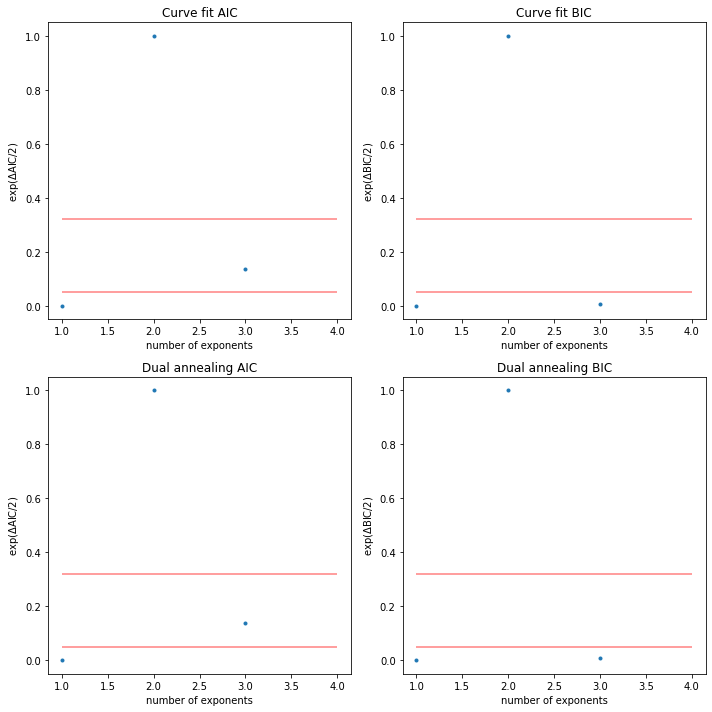

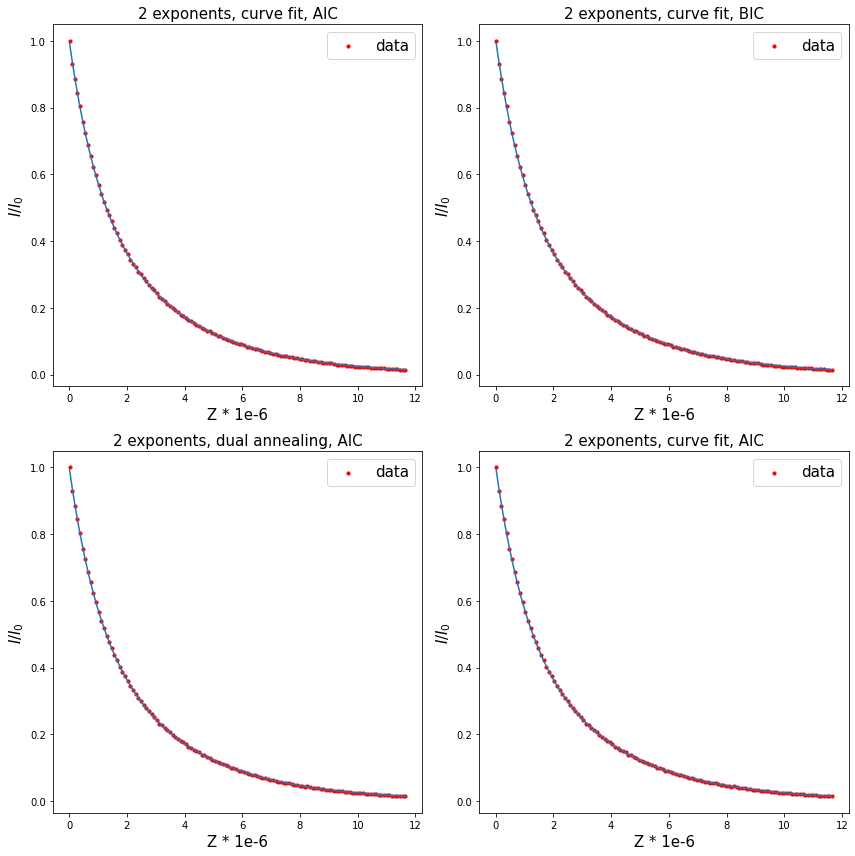

Curve fit
---------------------------
(w, D)
-----------------
(0.9236331585560256, 0.4307879940736198)

(0.6010728003213992, 0.3204700649930421)
(0.4037912255045219, 1.065864844375934)

(0.6010728292496801, 0.3204700728843462)
(0.39201241188860986, 1.0658646522007276)
(0.011778787861799107, 1.0658737086220191)


Dual annealing
---------------------------
(w, D)
-----------------
(0.9232490759475666, 0.4305638841381345)

(0.5969773348577994, 0.31938722597499797)
(0.4073782024874473, 1.0553922374293863)

(0.29854501704747877, 0.3194500932254475)
(0.2986662110310807, 0.3194518323888999)
(0.40716040029415257, 1.055910243686188)

R1-R2-5-5-new



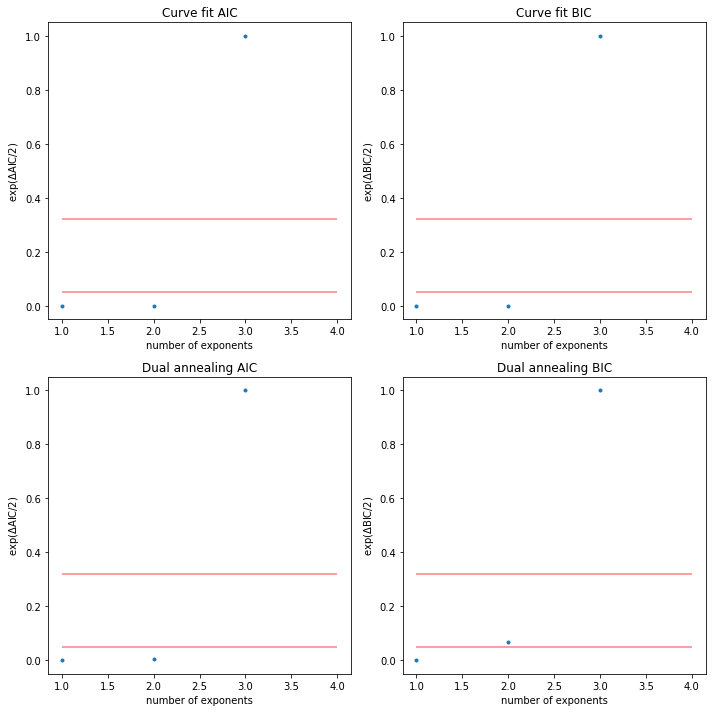

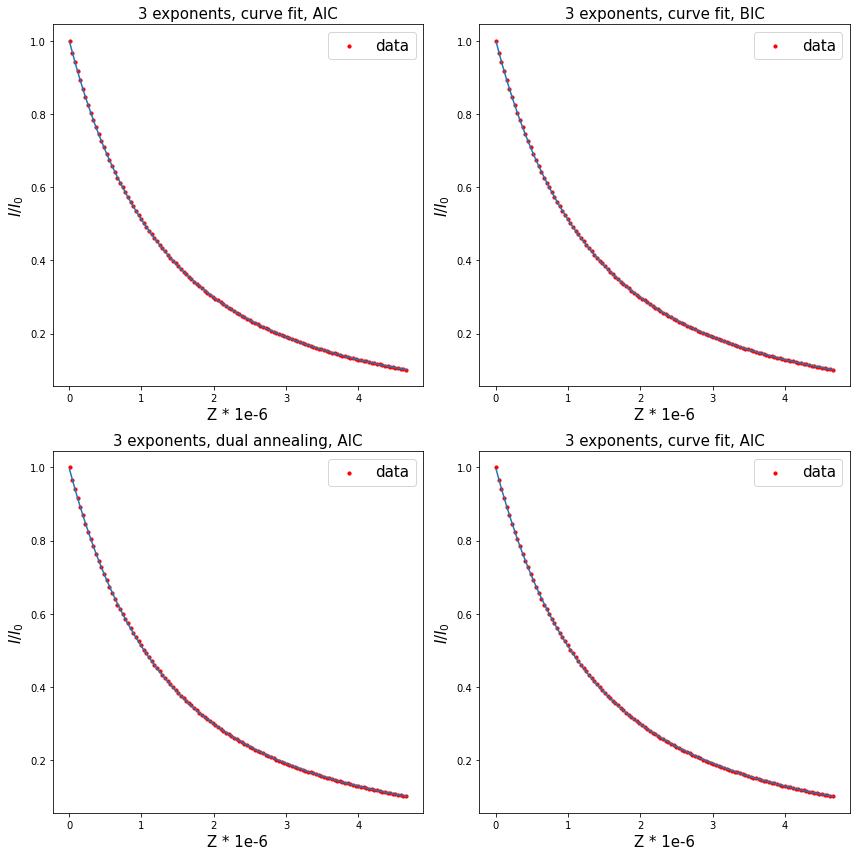

Curve fit
---------------------------
(w, D)
-----------------
(0.9323340151618045, 0.5494543277892806)

(0.49645966738658903, 0.34755838394004046)
(0.5031919571796316, 1.1408808093923526)

(0.4340638111311995, 0.32210498886457634)
(0.5436561877642347, 1.0162594996532621)
(0.02492357430893258, 3.542769641777954)


Dual annealing
---------------------------
(w, D)
-----------------
(0.9320759485156377, 0.5492417406126056)

(0.49121588617945616, 0.34525619588596673)
(0.5081514353563448, 1.132300257857584)

(0.1136875002696826, 0.22134703922474055)
(0.4327970072874252, 0.4281189129291808)
(0.453265864673399, 1.1862533723127682)



In [80]:
for i in range(1,6):
    print("---------------------------------")

    print("R1-R2-{}-{}".format(i, 5))
    print()
    try:
        dosy_analysis(home.joinpath("data/R1-R2", "R1-R2-{}-{}.txt".format(i, 5)))

    except FileNotFoundError:
        print("Missing data")

    print("R1-R2-{}-{}-new".format(i, 5))
    print()
    try:
        dosy_analysis(home.joinpath("data/R1-R2", "R1-R2-{}-{}-new.txt".format(i, 5)))

    except FileNotFoundError:
        print("Missing data")

#### Итог

In [100]:
data_cf = pd.DataFrame({"R1, 10e-6":[(0.176, 0.388),
                           (0.207, 0.359),
                           (0.151, 0.357),
                           (0.213, 0.348),
                           (0.192, 0.361),
                           (0.358, 0.359),
                           (0.192, 0.361)
],

                     "R2, 10e-6":[(0.823, 1.127),
                           (0.798, 1.074),
                           (0.854, 1.091),
                           (0.787, 1.075),
                           (0.812, 1.065),
                           (0.643, 1.153),
                           (0.811, 1.066)
                           ]})

data_da = pd.DataFrame({"R1, 10e-6":[(0.172, 0.384),
                              (0.204, 0.356),
                              (0.148, 0.355),
                              (0.211, 0.346),
                              (0.189, 0.358),
                              (0.354, 0.357),
                              (0.189, 0.358)
],

                        "R2, 10e-6":[(0.826, 1.124),
                              (0.801, 1.072),
                              (0.856, 1.089),
                              (0.789, 1.073),
                              (0.814, 1.063),
                              (0.646, 1.149),
                              (0.814, 1.063)
]})


print("Результаты для R1-R2 через curve-fit'")
data_cf.index = ["1-5", "1-5_new   ", "2-5", "2-5_new   ", "3-5", "3-5_new   ", "4-5"]
data_cf

Результаты для R1-R2 через curve-fit'


,"R1, 10e-6","R2, 10e-6"
1-5,"(0.176, 0.388)","(0.823, 1.127)"
1-5_new,"(0.207, 0.359)","(0.798, 1.074)"
2-5,"(0.151, 0.357)","(0.854, 1.091)"
2-5_new,"(0.213, 0.348)","(0.787, 1.075)"
3-5,"(0.192, 0.361)","(0.812, 1.065)"
3-5_new,"(0.358, 0.359)","(0.643, 1.153)"
4-5,"(0.192, 0.361)","(0.811, 1.066)"


In [101]:
print("Результаты для R1-R2 через dual-annealing'")
data_da.index = ["1-5", "1-5_new   ", "2-5", "2-5_new   ", "3-5", "3-5_new   ", "4-5"]
data_da

Результаты для R1-R2 через dual-annealing'


,"R1, 10e-6","R2, 10e-6"
1-5,"(0.172, 0.384)","(0.826, 1.124)"
1-5_new,"(0.204, 0.356)","(0.801, 1.072)"
2-5,"(0.148, 0.355)","(0.856, 1.089)"
2-5_new,"(0.211, 0.346)","(0.789, 1.073)"
3-5,"(0.189, 0.358)","(0.814, 1.063)"
3-5_new,"(0.354, 0.357)","(0.646, 1.149)"
4-5,"(0.189, 0.358)","(0.814, 1.063)"


#### Итог

- массовые доли не совпадают с ожидаемыми, но совпадают с файликом 

#### R1-R2-R5-2-2-2

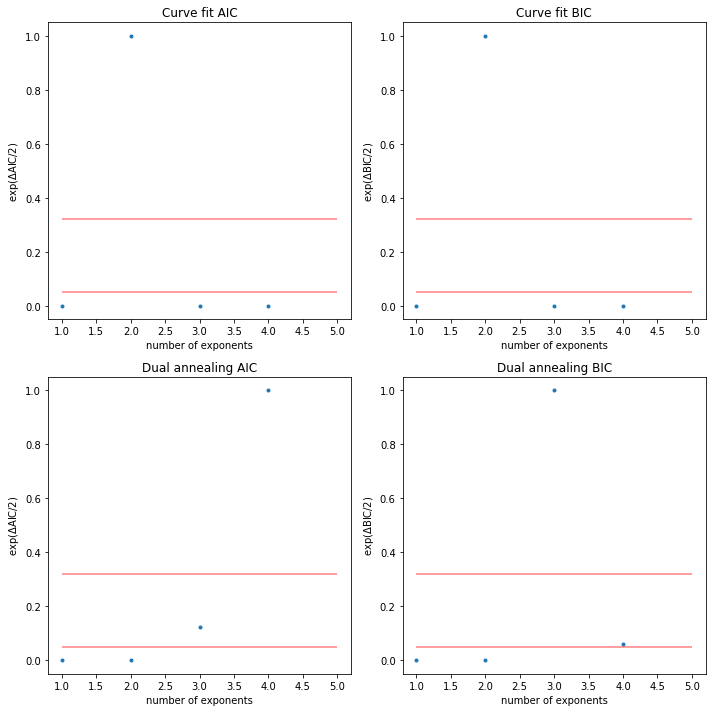

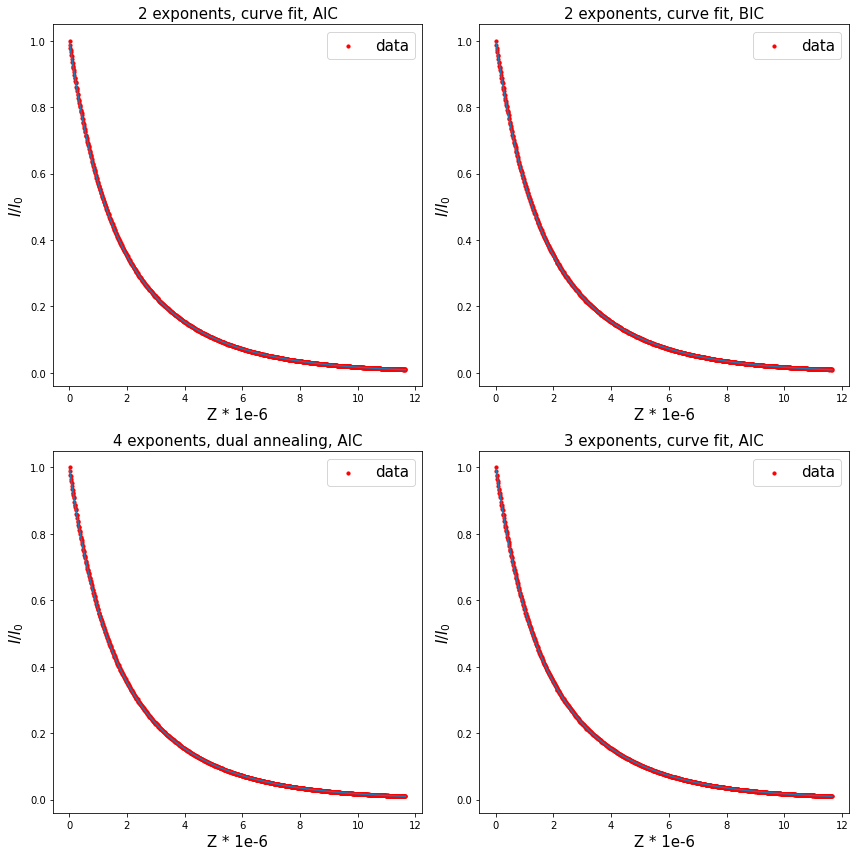

Curve fit
---------------------------
(w, D)
-----------------
(0.9426843287054727, 0.4652151030783293)

(0.6070062626978997, 0.3568499846076874)
(0.39733702451305575, 0.9765937672504946)

(0.5958249767380247, 0.3543756451939278)
(0.40473661266868133, 0.9493809681870076)
(0.010000000000012348, 9.999999893347542)

(0.010000000181967715, 0.17517799560142286)
(0.6079950313877237, 0.3658638755815317)
(0.3829635580416623, 0.9749678497265445)
(0.010000000000000002, 9.999999999999998)


Dual annealing
---------------------------
(w, D)
-----------------
(0.9425733572939466, 0.4651474378553633)

(0.6051783089257401, 0.35639518054902614)
(0.39901740510068506, 0.9732263066796663)

(0.22876582634498416, 0.3080992713282813)
(0.4183385904871781, 0.41110279981317516)
(0.35769997356757927, 1.0204009877606213)

(0.03763032827571273, 0.25801603708985554)
(0.04306702444288634, 0.2658212889750238)
(0.5657006027705377, 0.3892007650122655)
(0.35849513218049955, 1.0226174349100363)



In [104]:
x, y, params_cf, params_da = dosy_analysis(home.joinpath("data/R1-R2", "R1-R2-R5-2-2-2.txt"), n_min=1, n_max=4)

**Вывод**

- Анализ чистых данных показывает, что коэффициенты самодиффузии для R1 и R5 почти совпадают
- По коэффициентам dual annealing видно, что экспоненты 3

(0.229, 0.308)

(0.418, 0.411)

(0.358, 1.021)

- Компоненты взяты в равных долях, примерно в равных долях и получаются
- Коэффициенты самодиффузии для R1 и R2 совпали с анализом смесей R1-R2, R5 чуть побольше вышел, что тоже совпадает с ожиданиями